In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
print('Keras',keras.__version__)
print('TF',tf.__version__)

Keras 2.9.0
TF 2.9.1


### Loading the fashion MNIST data

In [3]:
fashion_mnist=keras.datasets.fashion_mnist

  Label	 Description
    0	  T-shirt/top
    1	  Trouser
    2	  Pullover
    3	  Dress
    4	  Coat
    5	  Sandal
    6	  Shirt
    7	  Sneaker
    8	  Bag
    9	  Ankle boot

### Splitting the data into train and test data

In [4]:
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()

### Checking the sample

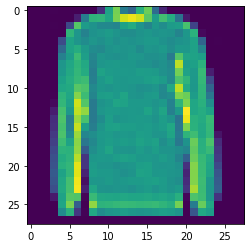

In [5]:
plt.imshow(x_train_full[45])

In [6]:
y_train_full[96]

4

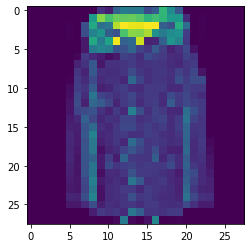

In [7]:
plt.imshow(x_train_full[96])

### As per labels , its a coat

### we will be labelling them with their class names

In [8]:
class_names=['Tees/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [9]:
class_names[y_train_full[96]]

'Coat'

#### Data Normalisation

In [10]:
x_train_n=x_train_full/255.
x_test_n=x_test/255.

##### Training data - for training
##### Validation - for validation/tuning hyperparams
##### Test data - for testing

In [11]:
x_valid,x_train=x_train_n[:5000],x_train_n[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
x_test=x_test_n

In [12]:
np.random.seed(42)
tf.random.set_seed(42) # just to make sure we get the same result every time

#### Modelling

In [13]:
model=keras.models.Sequential()

# INPUT LAYER
model.add(keras.layers.Flatten(input_shape=[28,28]))#flattening 28*28 into a 784 flat array

#HIDDEN LAYER 1,300-Number of neurons
model.add(keras.layers.Dense(300,activation='relu'))

#HIDDEN LAYER 2
model.add(keras.layers.Dense(100,activation='relu'))

#OUTPUT LAYER , 10 CATEGORIES KABATTI , 10 NEURONS, MCC KABATTI SOFTMAX
model.add(keras.layers.Dense(10,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### To visualize neural n/w

In [15]:
# pip install pydot

In [16]:
#import pydot

In [17]:
#keras.utils.plot_model(model) AVVATLEDU LE

In [18]:
#ACCESSING WEIGHTS , BIASES
weights,biases=model.layers[1].get_weights()

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

#### Setting up the learning process using compile()

In [22]:
#
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
#as we have specific labels for 10 different cat''s, we are using scc
#if instead we had probabilities we've gone for cross ent
#binary labels ayyi unte binary cross entropy choose cheskune vallam

In [23]:
model_hist=model.fit(x_train,y_train,epochs=30,
                     validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5212 - val_accuracy: 0.8222
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4345 - val_accuracy: 0.8536
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4390 - accuracy: 0.8455 - val_loss: 0.5386 - val_accuracy: 0.7968
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4123 - accuracy: 0.8567 - val_loss: 0.3914 - val_accuracy: 0.8656
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3938 - accuracy: 0.8617 - val_loss: 0.3746 - val_accuracy: 0.8682
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3752 - accuracy: 0.8676 - val_loss: 0.3709 - val_accuracy: 0.8732
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3632 - accuracy: 0.8716 - val_loss: 0.3621 - val_accuracy:

In [24]:
x_train.shape

(55000, 28, 28)

In [25]:
model_hist.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [26]:
model_hist.history

{'loss': [0.7236838340759277,
  0.4842020869255066,
  0.43900245428085327,
  0.41225653886795044,
  0.39383354783058167,
  0.37515944242477417,
  0.3631989061832428,
  0.35179612040519714,
  0.3414481580257416,
  0.3322538137435913,
  0.3241733908653259,
  0.3151012659072876,
  0.3083033859729767,
  0.3022802770137787,
  0.2949247658252716,
  0.28926798701286316,
  0.28409963846206665,
  0.27794349193573,
  0.2729496955871582,
  0.267539918422699,
  0.2626987397670746,
  0.25764229893684387,
  0.25365254282951355,
  0.24852682650089264,
  0.24441315233707428,
  0.24068626761436462,
  0.23645295202732086,
  0.2329440861940384,
  0.22844909131526947,
  0.2251434624195099],
 'accuracy': [0.7644363641738892,
  0.8317999839782715,
  0.8455454707145691,
  0.8566545248031616,
  0.8617091178894043,
  0.867581844329834,
  0.8716363906860352,
  0.875,
  0.8790545463562012,
  0.8822545409202576,
  0.8837090730667114,
  0.8868363499641418,
  0.8890727162361145,
  0.8915454745292664,
  0.8937090635

Plotting the history

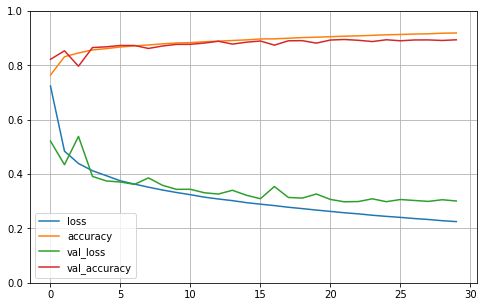

In [27]:
pd.DataFrame(model_hist.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### EVALUATION

In [28]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3353 - accuracy: 0.8843


[0.33525893092155457, 0.8842999935150146]

In [29]:
X_new=x_test[:3]

ikkada manam 2 params predict cheyagalam , 1 probab of each class, 2 finding class itself

In [30]:
y_prob=model.predict(X_new)

1/1 [==============================] - 0s 71ms/step


In [31]:
y_prob

array([[3.77200331e-06, 5.00641079e-07, 8.06468379e-05, 1.16021565e-05,
        5.73576654e-06, 1.24289300e-02, 5.93280220e-06, 2.83605605e-02,
        6.99379714e-04, 9.58402991e-01],
       [1.22919409e-05, 1.92390726e-08, 9.87468243e-01, 1.77792572e-08,
        1.22181196e-02, 4.63647653e-12, 3.01392487e-04, 1.91221206e-11,
        5.80181503e-09, 1.85034887e-11],
       [1.59973320e-06, 9.99997973e-01, 1.04734523e-08, 2.97897600e-07,
        1.37989090e-07, 1.27119425e-13, 4.46653547e-10, 2.58051610e-13,
        9.46063938e-09, 1.34223459e-12]], dtype=float32)

In [32]:
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [33]:
y_pred = np.argmax(y_prob, axis = -1)
y_pred

array([9, 2, 1], dtype=int64)

In [34]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U10')

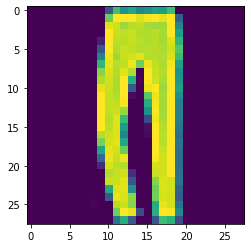

In [38]:
plt.imshow(x_test[2])

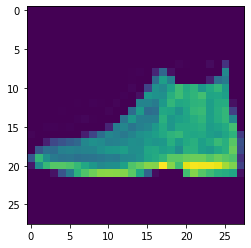

In [39]:
plt.imshow(x_test[0])

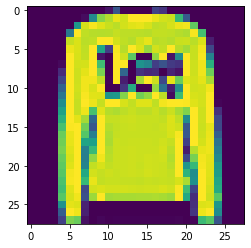

In [40]:
plt.imshow(x_test[1])